# Moved code into core library

In [1]:
import jax
import jax.numpy as jnp
from jax import jit, vmap

import Project_library as pl

import matplotlib.pyplot as plt

In [2]:
def generate_latitude_longitude_points(NumberOfPointsAlonglatitude, NumberOfPointsAlonglongitude, range_of_latitude = [-jnp.pi / 2, jnp.pi / 2], range_of_longitude = [-jnp.pi, jnp.pi]):
    latitude = jnp.linspace(range_of_latitude[0], range_of_latitude[1], NumberOfPointsAlonglatitude)
    longitude = jnp.linspace(range_of_longitude[0], range_of_longitude[1], NumberOfPointsAlonglongitude)
    cell_mesh = jnp.meshgrid(latitude, longitude)
    return cell_mesh


# x=ρsinφcosθ,y=ρsinφsinθ, and z=ρcosφ for spherical coordinates
# Here, we assume ρ=0 for unit sphere
@jit
def spherical_to_cartesian(latitude, longitude):
    x = jnp.cos(longitude) * jnp.cos(latitude)  # Longitude
    y = jnp.cos(latitude) * jnp.sin(longitude)
    z = jnp.sin(latitude)  # Example function for z value
    return x, y, z



def three_dimensional_plot_latitude_longitude_points(cell_mesh):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_box_aspect([1, 1, 1])
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Value')
    ax.view_init(30, 45)
    
    

    calculate_along_row = vmap(spherical_to_cartesian, in_axes=(0, 0))

    for i in range(cell_mesh[0].shape[0]):
        x,y,z = calculate_along_row(cell_mesh[0][i], cell_mesh[1][i])
        ax.scatter(x, y, z, color='b', marker='o')
    
    plt.show()

Test if by visual inspection the grid map works.

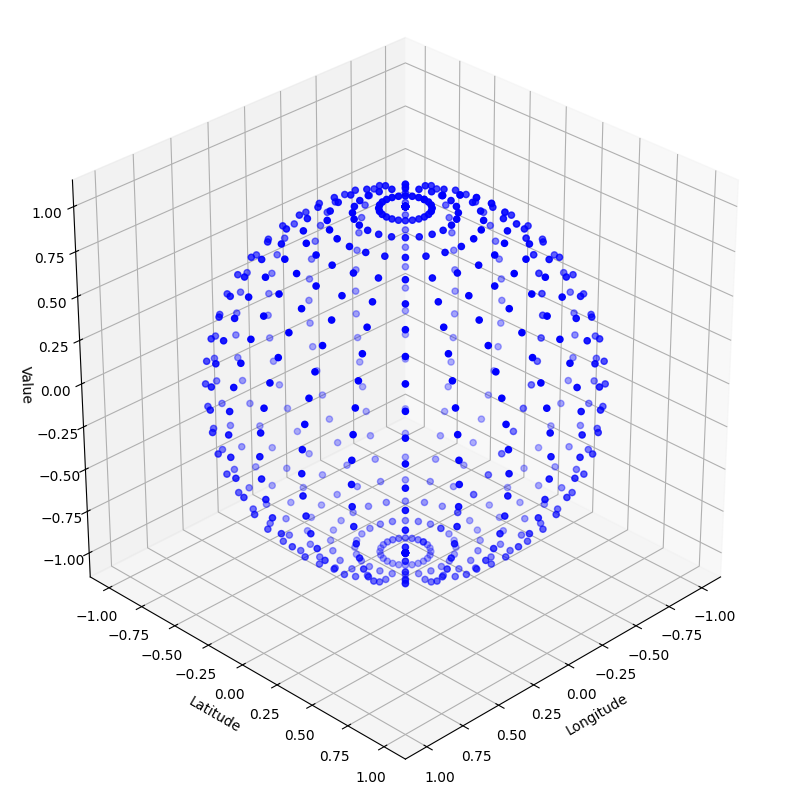

In [3]:
NumberOfPointsAlonglatitude = 25
NumberOfPointsAlonglongitude = 25
TotalNumberOfPoints = NumberOfPointsAlonglatitude * NumberOfPointsAlonglongitude


cell_mesh = generate_latitude_longitude_points(NumberOfPointsAlonglatitude, NumberOfPointsAlonglongitude, [-jnp.pi/2, jnp.pi/2], [-jnp.pi, jnp.pi])

three_dimensional_plot_latitude_longitude_points(cell_mesh)
# This code generates a 3D plot of latitude and longitude points on a sphere.


Calculate divison angles array and then sort a user into a zone

In [4]:
def generate_latitude_longitude_divisions(NumberOfPointsAlonglatitude, NumberOfPointsAlonglongitude, range_of_latitude = [-jnp.pi / 2, jnp.pi / 2], range_of_longitude = [-jnp.pi, jnp.pi]):
    off_set_latitude = (range_of_latitude[1] - range_of_latitude[0]) / (NumberOfPointsAlonglatitude*2)
    off_set_longitude = (range_of_longitude[1] - range_of_longitude[0]) / (NumberOfPointsAlonglongitude*2)

    range_of_latitude = [range_of_latitude[0] + off_set_latitude, range_of_latitude[1] - off_set_latitude]
    range_of_longitude = [range_of_longitude[0] + off_set_longitude, range_of_longitude[1] - off_set_longitude]

    latitude = jnp.linspace(range_of_latitude[0], range_of_latitude[1], NumberOfPointsAlonglatitude)
    longitude = jnp.linspace(range_of_longitude[0], range_of_longitude[1], NumberOfPointsAlonglongitude)
    return latitude,longitude

lat_div, long_div = generate_latitude_longitude_divisions(NumberOfPointsAlonglatitude, NumberOfPointsAlonglongitude, [-jnp.pi/4, jnp.pi/4], [-jnp.pi, jnp.pi])

# Search for a user within an area, lets say latitude 30 degrees and longitude 12.69 degrees

user = jnp.array([jnp.deg2rad(30), jnp.deg2rad(20.69)])

cell_number = jnp.searchsorted(lat_div, jnp.deg2rad(30)), jnp.searchsorted(long_div, jnp.deg2rad(20.69))

jnp.rad2deg(lat_div[cell_number[0]-1]), jnp.rad2deg(lat_div[cell_number[0]]), jnp.rad2deg(long_div[cell_number[1]-1]), jnp.rad2deg(long_div[cell_number[1]])

(Array(28.800001, dtype=float32),
 Array(32.4, dtype=float32),
 Array(14.400006, dtype=float32),
 Array(28.800013, dtype=float32))

In [8]:
@jit
def assign_user_to_cell(user : pl.User , lat_div, long_div):
    cell_number = jnp.searchsorted(lat_div, user.latitude), jnp.searchsorted(long_div, user.longitude)
    return cell_number

user = pl.User(latitude=jnp.deg2rad(30), longitude=jnp.deg2rad(20.69), id = 1)
# Assign the user to a cell based on their latitude and longitude
cell_number = assign_user_to_cell(user, lat_div, long_div)

print(f"User is in cell: {cell_number}")

User is in cell: (Array(21, dtype=int32), Array(14, dtype=int32))
